## Problem Description
##### The problem is the International Airline Passengers prediction problem.

* This is a problem where, given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations.

In [17]:
import numpy as np
import pandas as pd

In [18]:
# convert an array of values into a dataset matrix
def create_dataset(data, look_back=1):
	dataX, dataY = [], []
	for i in range(len(data)-look_back-1):
		a = data[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(data[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [19]:
data=pd.read_csv("airline-passengers.csv",usecols=[1], engine='python')

In [20]:
data

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [21]:
import matplotlib.pyplot as plt

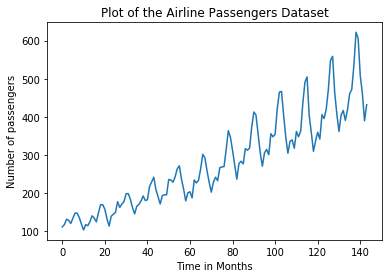

In [22]:
plt.plot(data)
plt.title("Plot of the Airline Passengers Dataset")
plt.ylabel("Number of passengers")
plt.xlabel("Time in Months")
plt.show()

### Long Short-Term Memory Network For Regression

In [23]:
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

In [24]:
# fixing random seed for reproducibility
import numpy
import pandas
numpy.random.seed(7)

In [25]:
# Converting integer Values to floating values to make network
data = data.values
data = data.astype('float32')

In [26]:
# normalize the dataset in the range 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [27]:
# split into train and test sets
train_size = int(len(data) * 0.67)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

96 48


In [28]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [29]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [30]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 0s - loss: 0.0674
Epoch 2/100
 - 0s - loss: 0.0359
Epoch 3/100
 - 0s - loss: 0.0250
Epoch 4/100
 - 0s - loss: 0.0216
Epoch 5/100
 - 0s - loss: 0.0202
Epoch 6/100
 - 0s - loss: 0.0191
Epoch 7/100
 - 0s - loss: 0.0182
Epoch 8/100
 - 0s - loss: 0.0175
Epoch 9/100
 - 0s - loss: 0.0164
Epoch 10/100
 - 0s - loss: 0.0154
Epoch 11/100
 - 0s - loss: 0.0147
Epoch 12/100
 - 0s - loss: 0.0138
Epoch 13/100
 - 0s - loss: 0.0128
Epoch 14/100
 - 0s - loss: 0.0120
Epoch 15/100
 - 0s - loss: 0.0111
Epoch 16/100
 - 0s - loss: 0.0103
Epoch 17/100
 - 0s - loss: 0.0095
Epoch 18/100
 - 0s - loss: 0.0086
Epoch 19/100
 - 0s - loss: 0.0079
Epoch 20/100
 - 0s - loss: 0.0071
Epoch 21/100
 - 0s - loss: 0.0063
Epoch 22/100
 - 0s - loss: 0.0056
Epoch 23/100
 - 0s - loss: 0.0050
Epoch 24/100
 - 0s - loss: 0.0044
Epoch 25/100
 - 0s - loss: 0.0040
Epoch 26/100
 - 0s - loss: 0.0035
Epoch 27/100
 - 0s - loss: 0.0031
Epoch 28/100
 - 0s - loss: 0.0028
Epoch 29/100
 - 0s - loss: 0.0026
Epoch 30/100
 - 0s - lo

In [31]:
from sklearn.metrics import mean_squared_error
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.73 RMSE
Test Score: 54.30 RMSE


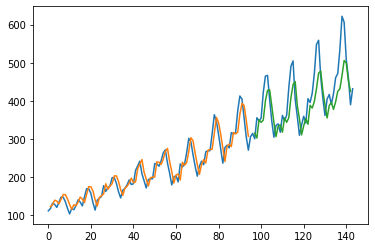

In [32]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()